In [2]:
import pandas as pd
df=pd.read_csv("Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70.0,1,4,130,322.0,0,2,109,0,2.4,2,3,3,Presence
1,67.0,0,3,115,564.0,0,2,160,0,1.6,2,0,7,Absence
2,57.0,1,2,124,261.0,0,0,141,0,0.3,1,0,7,Presence
3,64.0,1,4,128,263.0,0,0,105,1,0.2,2,1,7,Absence
4,74.0,0,2,120,269.0,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1,3,172,199.0,1,0,162,0,0.5,1,0,7,Absence
266,44.0,1,2,120,263.0,0,0,173,0,0.0,1,0,7,Absence
267,56.0,0,2,140,294.0,0,2,153,0,1.3,2,0,3,Absence
268,57.0,1,4,140,192.0,0,0,148,0,0.4,2,0,6,Absence


In [3]:
df.isnull().sum()

Age                        1
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                1
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              2
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [4]:
df=df.dropna()
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
df.dtypes

Age                        float64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                float64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

C:\Users\840 G6 Core i7\AppData\Local\Temp\ipykernel_16164\3723671215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

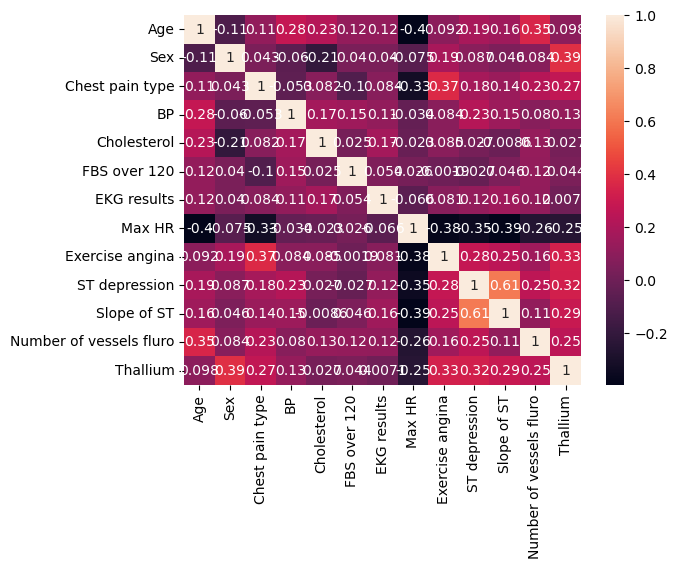

In [6]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


In [7]:
x=df.iloc[:,:-1]
x=x.to_numpy()
x

array([[70.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  0.,  3., ...,  2.,  0.,  7.],
       [57.,  1.,  2., ...,  1.,  0.,  7.],
       ...,
       [56.,  0.,  2., ...,  2.,  0.,  3.],
       [57.,  1.,  4., ...,  2.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.]])

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x)
x1 = model.transform(x)
x1

array([[ 1.71114472,  0.68528334,  0.87278708, ...,  0.67828089,
         2.4530331 , -0.88739695],
       [ 1.37915019, -1.45925041, -0.18731047, ...,  0.67828089,
        -0.71960938,  1.17415404],
       [ 0.27250177,  0.68528334, -1.24740801, ..., -0.947149  ,
        -0.71960938,  1.17415404],
       ...,
       [ 0.16183693, -1.45925041, -1.24740801, ...,  0.67828089,
        -0.71960938, -0.88739695],
       [ 0.27250177,  0.68528334,  0.87278708, ...,  0.67828089,
        -0.71960938,  0.65876629],
       [ 1.37915019,  0.68528334,  0.87278708, ...,  0.67828089,
         2.4530331 , -0.88739695]])

In [9]:
y=df.iloc[:,-1]
y

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 266, dtype: object

In [10]:
y.value_counts()

Absence     146
Presence    120
Name: Heart Disease, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x1,y,test_size=0.20)
print(x_train.shape,x_test.shape)

(212, 13) (54, 13)


In [12]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,classification_report

models=[SVC(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier()]
names=["SVM","KNN","NB","DT","RF","ET"]
modelstr=[]
for name,model in zip(names,models):
    print(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("______________________________________________________________________________________")
    modelstr.append(model)
          

SVM
[[20  5]
 [11 18]]
              precision    recall  f1-score   support

     Absence       0.65      0.80      0.71        25
    Presence       0.78      0.62      0.69        29

    accuracy                           0.70        54
   macro avg       0.71      0.71      0.70        54
weighted avg       0.72      0.70      0.70        54

______________________________________________________________________________________
KNN
[[21  4]
 [ 9 20]]
              precision    recall  f1-score   support

     Absence       0.70      0.84      0.76        25
    Presence       0.83      0.69      0.75        29

    accuracy                           0.76        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54

______________________________________________________________________________________
NB
[[21  4]
 [10 19]]
              precision    recall  f1-score   support

     Absence       0.68      0.84      0.75      

In [13]:
import pickle
pickle.dump(modelstr,open("model.pkl","wb"))

In [14]:
for name,model in zip(names,modelstr):
    print(name)
    print(model.predict([x[100]]))

SVM
['Absence']
KNN
['Presence']
NB
['Presence']
DT
['Presence']
RF
['Presence']
ET
['Presence']


In [78]:
y[100]

'Absence'

In [79]:
y_test

136     Absence
41      Absence
199    Presence
142    Presence
92     Presence
109     Absence
133    Presence
177    Presence
29      Absence
182    Presence
2      Presence
208    Presence
163    Presence
39      Absence
23      Absence
111     Absence
99      Absence
98      Absence
268     Absence
211     Absence
178    Presence
127     Absence
197     Absence
225     Absence
259     Absence
176    Presence
140    Presence
255     Absence
169    Presence
151     Absence
72      Absence
93     Presence
16     Presence
128     Absence
204    Presence
45      Absence
12      Absence
130    Presence
162     Absence
71      Absence
9      Presence
17     Presence
265     Absence
95     Presence
195     Absence
122    Presence
10      Absence
103    Presence
73      Absence
123     Absence
104    Presence
120    Presence
37     Presence
97     Presence
Name: Heart Disease, dtype: object

In [80]:
Age=float(input("enter Age="))
Sex=int(input("enter SEX="))
cpain=int(input("enter CPAIN="))
BP=int(input("enter BP="))
CH=float(input("enter CH="))
FBS=int(input("enter FBS="))
EKG=int(input("enter EKG="))
MAXHR=int(input("enter MAXHR="))
EA=int(input("enter EA="))
ST=float(input("enter ST="))
SST=int(input("enter SST="))
NUMBER=int(input("enter NUMBER="))
TH=int(input("enter TH="))
model.predict([[Age,Sex,cpain,BP,CH,FBS,EKG,MAXHR,EA,ST,SST,NUMBER,TH]])[0]

enter Age=70.0
enter SEX=1
enter CPAIN=4
enter BP=130
enter CH=322.0
enter FBS=0
enter EKG=2
enter MAXHR=109
enter EA=0
enter ST=2.4
enter SST=2
enter NUMBER=3
enter TH=3


'Presence'